# Adding images for training from a video

This notebook is similar to the previous one but the source of the images to label will be a video.

As an example here, we will generate the video from a camera and then work from the video.

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import ipywidgets as widgets
from ipyevents import Event 
import threading
from IPython.display import display
from camera import USBCamera, bgr8_to_jpeg
from multiClassUNetDataset import MultiClassUNetDataset
from trackingProject import TrackingProject
from unetGUI import LabelFromImagesGUI

Load a project

In [2]:
project = TrackingProject(name="faceTrack",root_folder = "/home/kevin/Documents/trackingProjects/")

Project directory: /home/kevin/Documents/trackingProjects/faceTrack
Loading /home/kevin/Documents/trackingProjects/faceTrack/config.yalm
{'name': 'faceTrack', 'object_colors': [(0.0, 0.0, 255.0), (255.0, 0.0, 0.0), (255.0, 255.0, 0.0), (128.0, 0.0, 128.0)], 'objects': ['nose', 'chin', 'rEye', 'lEye'], 'target_radius': 10, 'image_size': [480, 640], 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_HorizontalFlipProb': 0.5, 'augmentation_RotateProb': 0.3, 'augmentation_RandomBrightnessContrastProb': 0.2, 'labeling_ImageEnlargeFactor': 2.0}


Create a dataset for the project.

In [3]:
dataset = MultiClassUNetDataset(image_dir=project.image_dir, mask_dir=project.mask_dir, coordinates_dir=project.coordinates_dir)

In [4]:
len(dataset)

172

In [5]:
!ls -ltrh /dev/video*

crw-rw----+ 1 root video 81, 1 Nov 23 07:59 /dev/video1
crw-rw----+ 1 root video 81, 0 Nov 23 07:59 /dev/video0


Get a camera to create a video

In [6]:
camera = USBCamera(width=project.image_size[1], height=project.image_size[0])

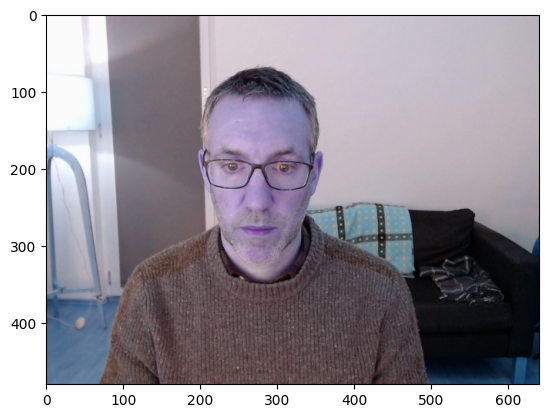

In [7]:
frame = camera.read()
plt.imshow(frame)

Save a video from the camera

In [12]:
frame2save=30*10
video_fn = '/home/kevin/Documents/video1.avi'
size=project.image_size[1],project.image_size[0]
video = cv2.VideoWriter(video_fn, cv2.VideoWriter_fourcc(*'MJPG'),30, size)

# loop to save the video
for i in range(frame2save):
    frame = camera.read()
    video.write(frame)
    
video.release()

Extract frames from a video

In [13]:
extracted_frame_dir = project.project_dir+"/extracted_frames/"
print(extracted_frame_dir)

/home/kevin/Documents/trackingProjects/faceTrack/extracted_frames/


In [14]:
dataset.extract_frames_from_video(video_fn,10,extracted_frame_dir)

Extracting frames: [ 72  77 134 147 149 150 168 197 280 294] to /home/kevin/Documents/trackingProjects/faceTrack/extracted_frames/


## Label extracted frames and save to dataset


In [15]:
LabelFromImagesGUI(image_dir=extracted_frame_dir,project=project,dataset=dataset)

In [16]:
len(dataset)

182